In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data=pd.read_csv("C:/Users/gaelm/Downloads/vgsales.csv.zip")

In [3]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

In [6]:
data = data.dropna().reset_index(drop=True)

In [7]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
data.shape

(15945, 11)

In [9]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
15940,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
15941,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
15942,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
15943,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [10]:
data['Genre'].value_counts()

Genre
Action          3132
Sports          2266
Misc            1668
Role-Playing    1428
Shooter         1250
Adventure       1241
Racing          1205
Platform         865
Simulation       838
Fighting         822
Strategy         660
Puzzle           570
Name: count, dtype: int64

In [11]:
data["Year"] = data["Year"].astype(int)

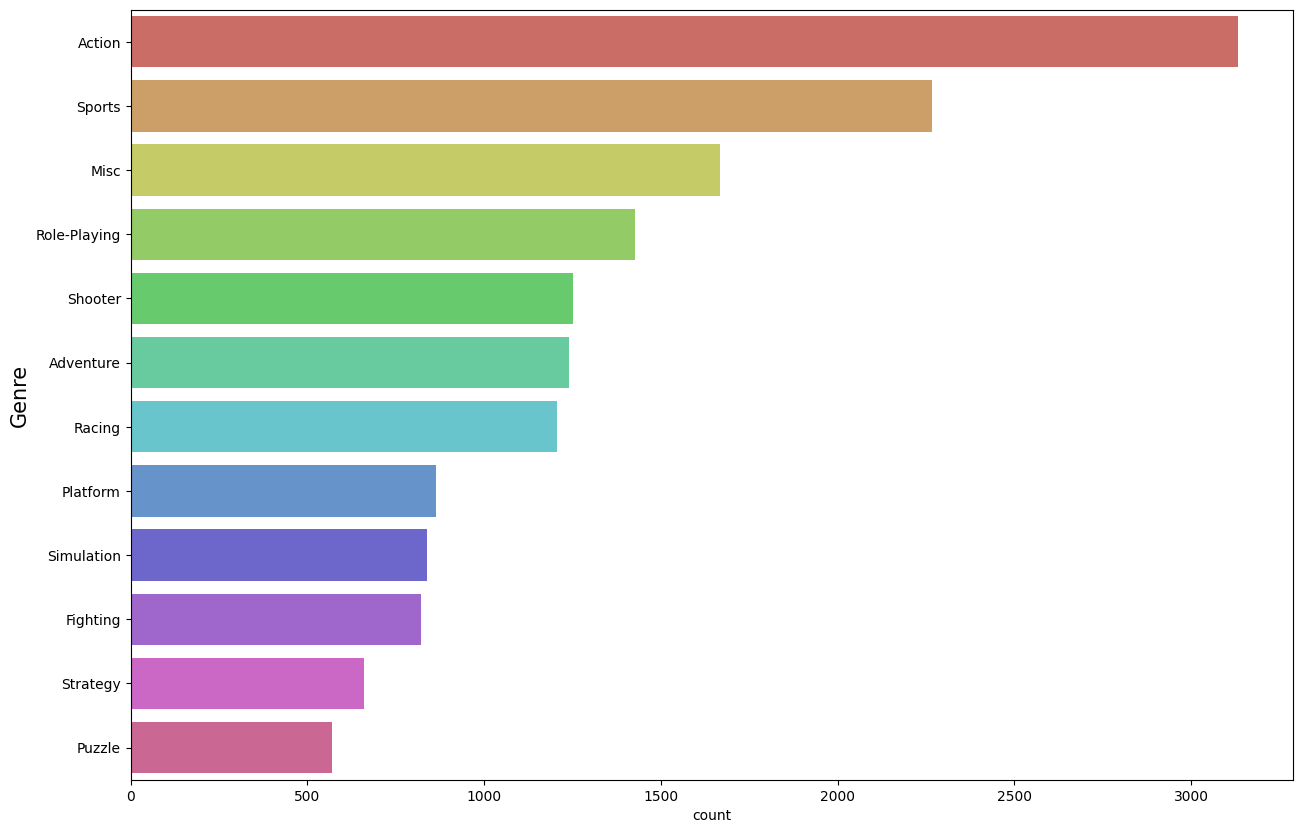

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(data['Genre'], palette='hls',order = data['Genre'].value_counts().index)
plt.ylabel('Genre',fontsize=15)
plt.show()

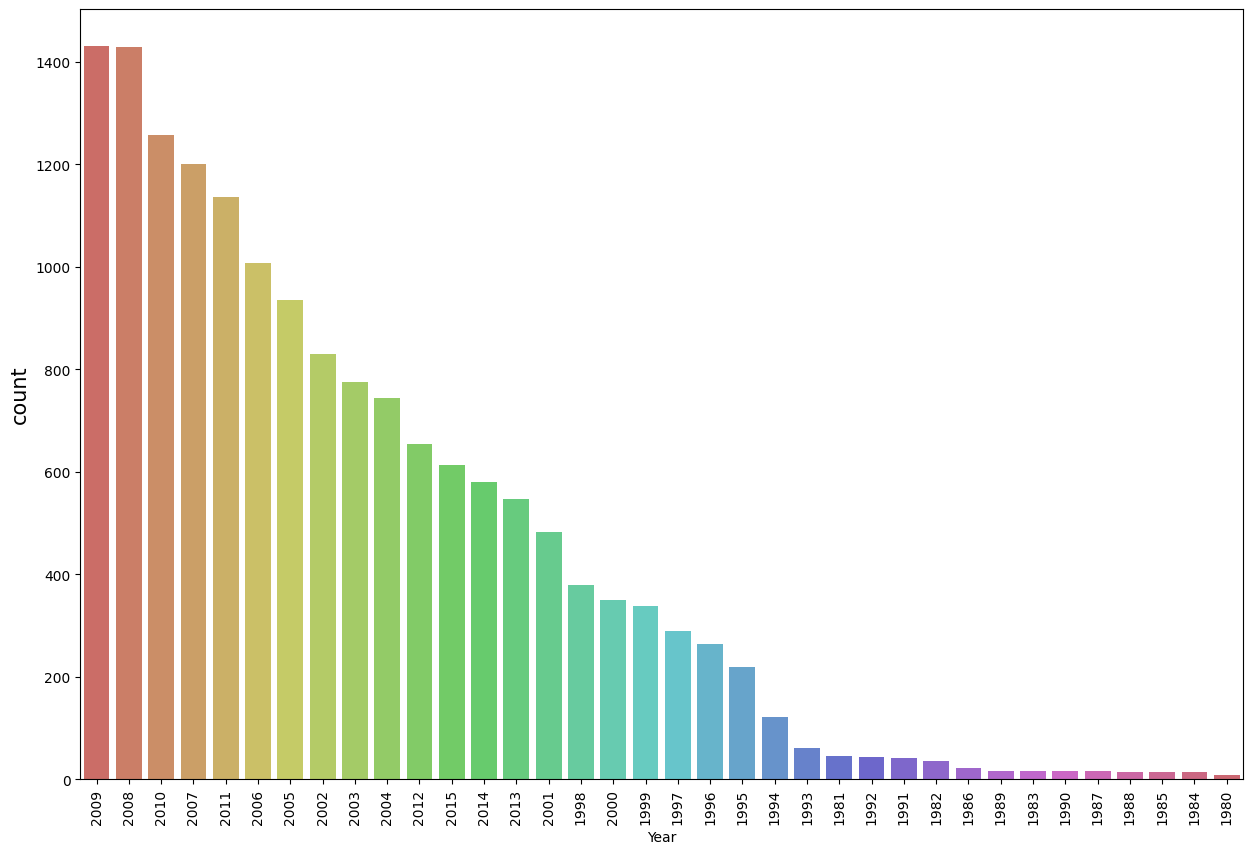

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x="Year", data=data, palette='hls', order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

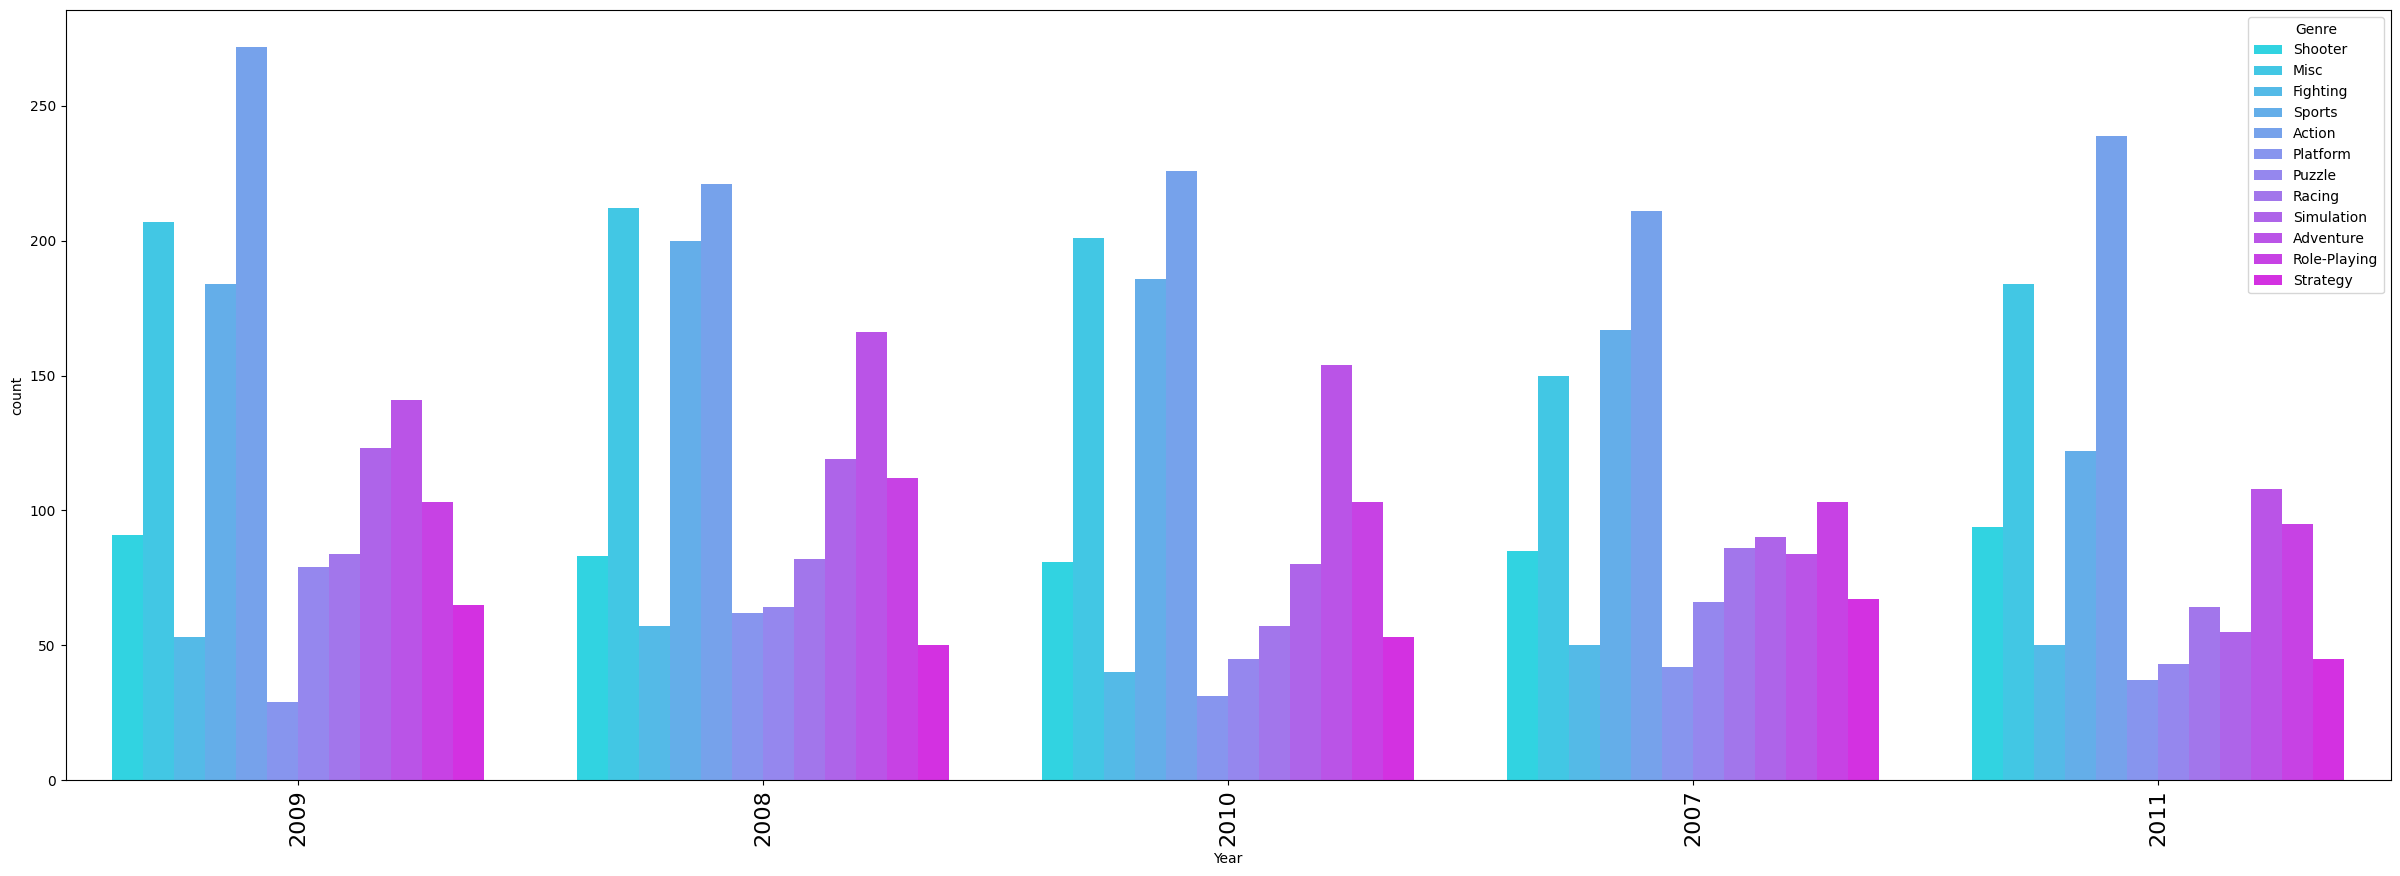

In [14]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, palette ="cool", hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)
plt.show()

In [15]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

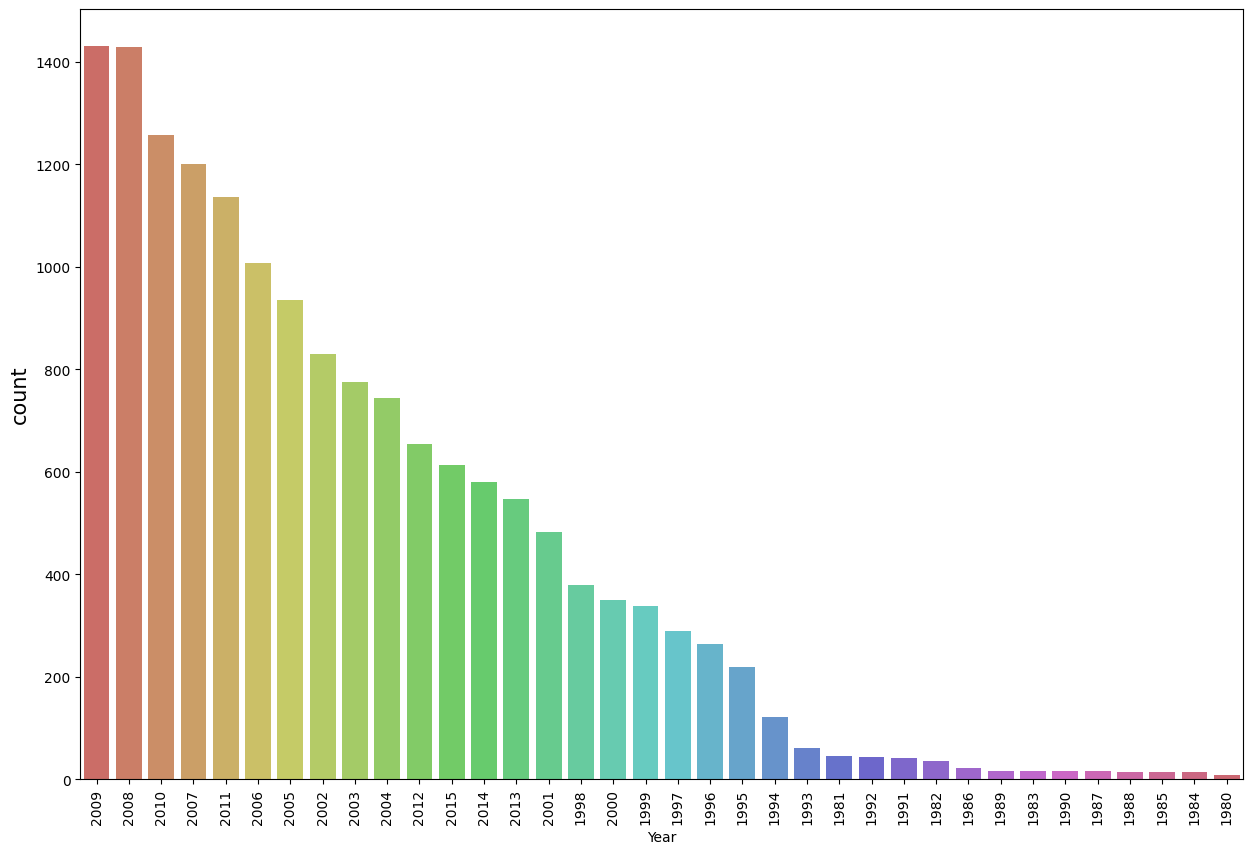

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x="Year", data=data, palette='hls', order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

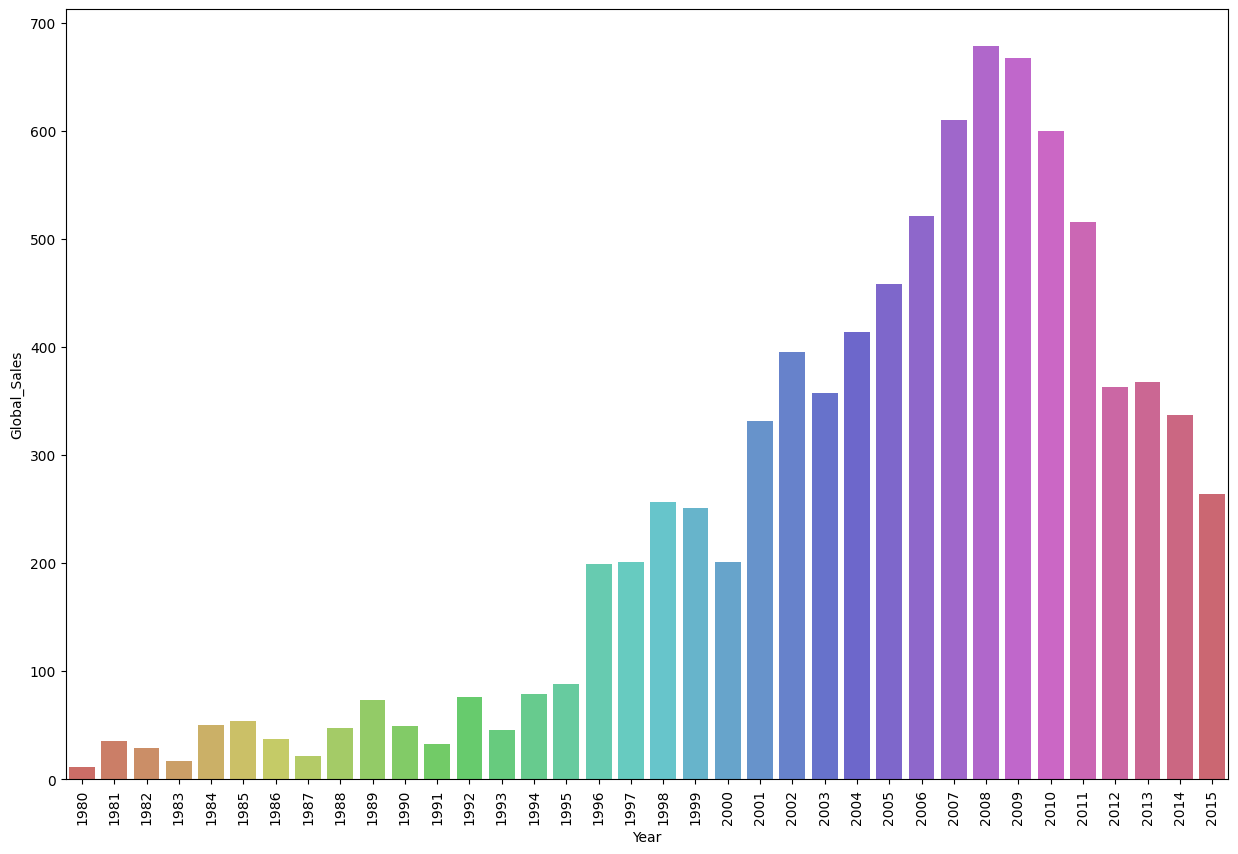

In [17]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales",palette='hls', data=data_year)
plt.xticks(rotation=90)
plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15945 entries, 0 to 15944
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          15945 non-null  int64  
 1   Name          15945 non-null  object 
 2   Platform      15945 non-null  object 
 3   Year          15945 non-null  int32  
 4   Genre         15945 non-null  object 
 5   Publisher     15945 non-null  object 
 6   NA_Sales      15945 non-null  float64
 7   EU_Sales      15945 non-null  float64
 8   JP_Sales      15945 non-null  float64
 9   Other_Sales   15945 non-null  float64
 10  Global_Sales  15945 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


In [19]:
data.Publisher.value_counts()

Publisher
Electronic Arts                 1319
Activision                       952
Ubisoft                          904
Namco Bandai Games               888
Konami Digital Entertainment     815
                                ... 
Milestone                          1
Abylight                           1
Glams                              1
Locus                              1
Rain Games                         1
Name: count, Length: 564, dtype: int64

In [20]:
data.Publisher.value_counts()[0:50]

Publisher
Electronic Arts                           1319
Activision                                 952
Ubisoft                                    904
Namco Bandai Games                         888
Konami Digital Entertainment               815
THQ                                        712
Nintendo                                   686
Sony Computer Entertainment                677
Sega                                       622
Take-Two Interactive                       400
Capcom                                     358
Atari                                      346
Tecmo Koei                                 321
Disney Interactive Studios                 214
Square Enix                                211
Warner Bros. Interactive Entertainment     203
Midway Games                               196
Eidos Interactive                          196
Microsoft Game Studios                     185
505 Games                                  185
Acclaim Entertainment                      184
D3P

In [21]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

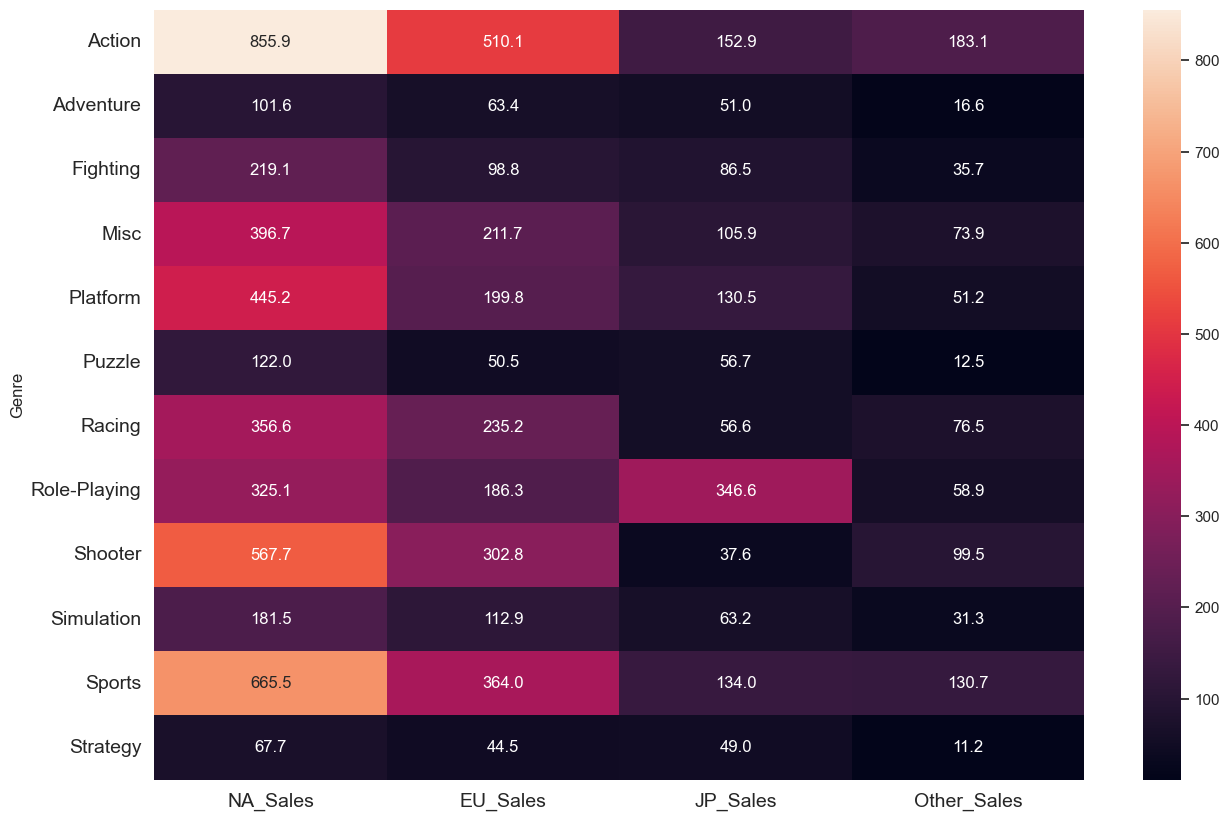

In [22]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [23]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,855.90
1,Adventure,NA_Sales,101.59
2,Fighting,NA_Sales,219.14
3,Misc,NA_Sales,396.70
4,Platform,NA_Sales,445.20


<Axes: xlabel='Genre', ylabel='Sale_Price'>

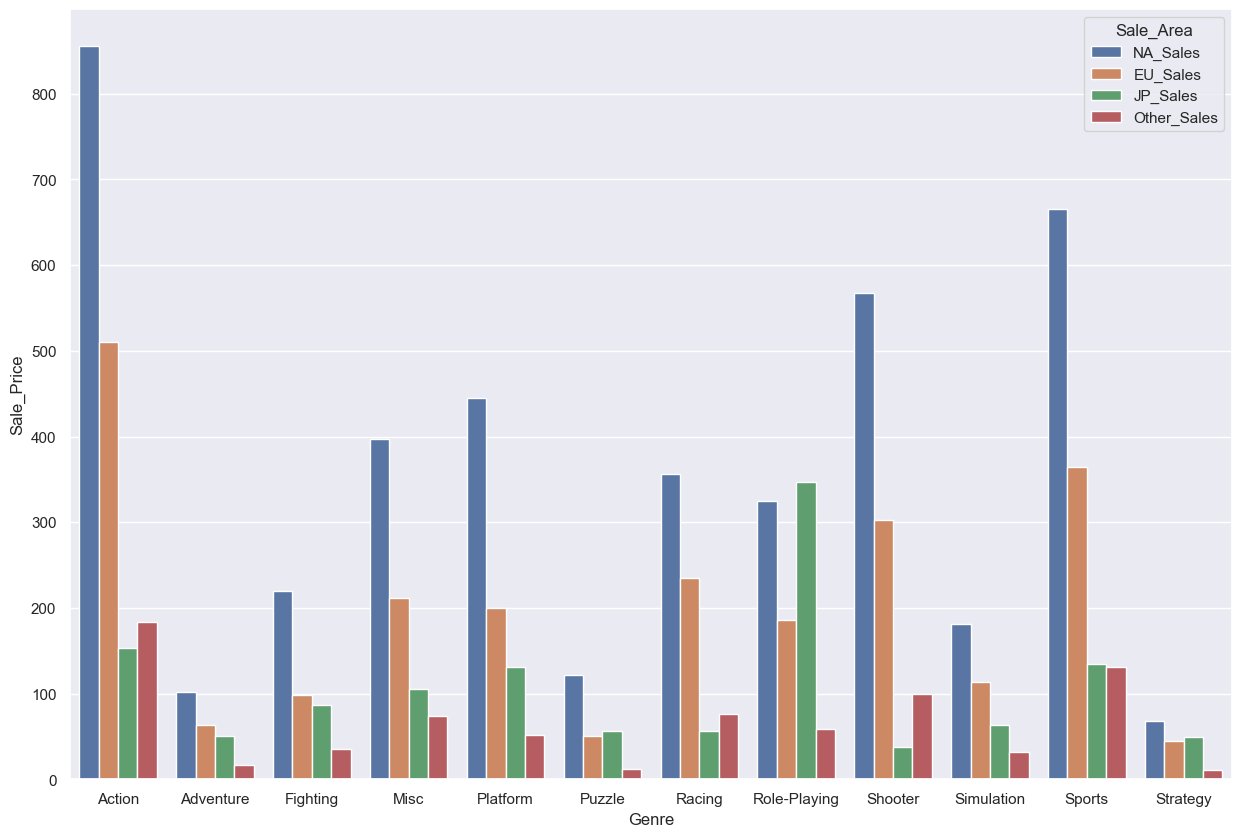

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

In [25]:
total_sales_NA = data["NA_Sales"].sum()
total_sales_NA

4304.72

In [26]:
data["%_sales_NA"] = data["NA_Sales"].apply(lambda sale: sale / total_sales_NA * 100)

In [27]:
total_sales_EU = data["EU_Sales"].sum()
total_sales_EU

2379.93

In [28]:
data["%_sales_EU"] = data["EU_Sales"].apply(lambda sale: sale / total_sales_EU * 100)

In [29]:
total_sales_JP = data["JP_Sales"].sum()
total_sales_JP

1270.5500000000002

In [30]:
data["%_sales_JP"] = data["JP_Sales"].apply(lambda sale: sale / total_sales_JP * 100)

In [31]:
total_sales_Other = data["Other_Sales"].sum()
total_sales_Other

781.1400000000001

In [32]:
data["%_sales_Other"] = data["Other_Sales"].apply(lambda sale: sale / total_sales_Other * 100)

In [33]:
total_sales_Global = data["Global_Sales"].sum()
total_sales_Global

8740.730000000001

In [34]:
data["%_sales_Global"] = data["Global_Sales"].apply(lambda sale: sale / total_sales_Global * 100)

In [35]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,%_sales_NA,%_sales_EU,%_sales_JP,%_sales_Other,%_sales_Global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.963826,1.219364,0.296722,1.083032,0.946603
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.675538,0.150425,0.535988,0.098574,0.460373
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.368200,0.541192,0.298296,0.423740,0.409806
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.365877,0.462619,0.258156,0.378933,0.377543
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.261806,0.373540,0.804376,0.128018,0.358895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15940,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.000232,0.000000,0.000000,0.000000,0.000114
15941,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.000232,0.000000,0.000000,0.000000,0.000114
15942,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.000000,0.000114
15943,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.000000,0.000420,0.000000,0.000000,0.000114


In [36]:
data["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [37]:
NA_group =data.groupby(['Genre','%_sales_NA'],as_index=False).count()

In [38]:
EU_group =data.groupby(['Genre','%_sales_EU'],as_index=False).count()

In [39]:
JP_group =data.groupby(['Genre','%_sales_JP'],as_index=False).count()

In [40]:
Other_group =data.groupby(['Genre','%_sales_Other'],as_index=False).count()

In [41]:
Global_group =data.groupby(['Genre','%_sales_Global'],as_index=False).count()

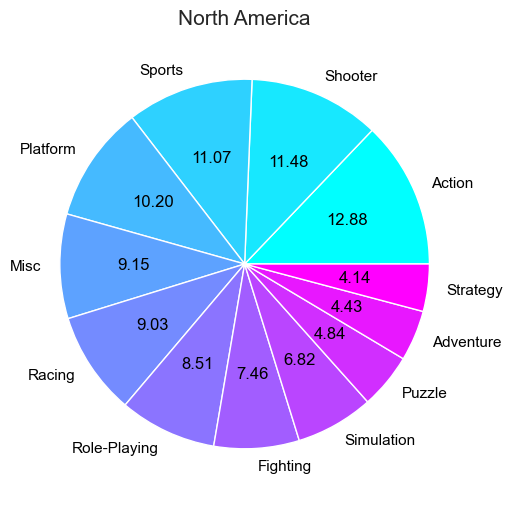

In [42]:
plt.figure(figsize=(8,6))
NA_group["Genre"].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('North America',fontsize=15)
plt.ylabel("")
plt.show()

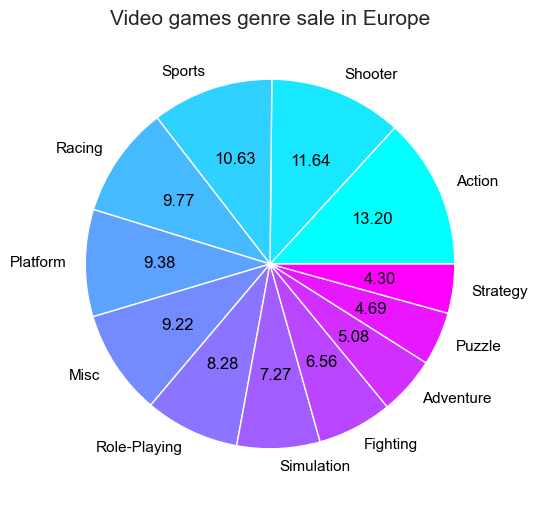

In [43]:
plt.figure(figsize=(8,6))
EU_group["Genre"].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Video games genre sale in Europe',fontsize=15)
plt.ylabel("")
plt.show()

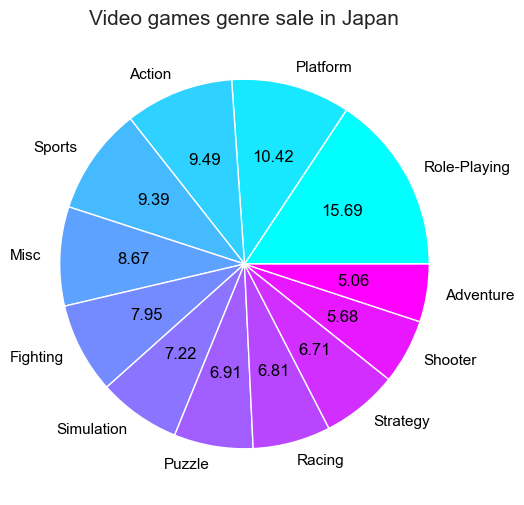

In [44]:
plt.figure(figsize=(8,6))
JP_group["Genre"].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Video games genre sale in Japan',fontsize=15)
plt.ylabel("")
plt.show()

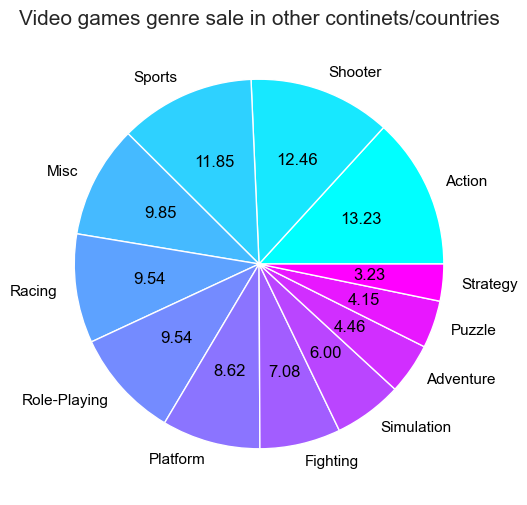

In [45]:
plt.figure(figsize=(8,6))
Other_group["Genre"].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Video games genre sale in other continets/countries',fontsize=15)
plt.ylabel("")
plt.show()

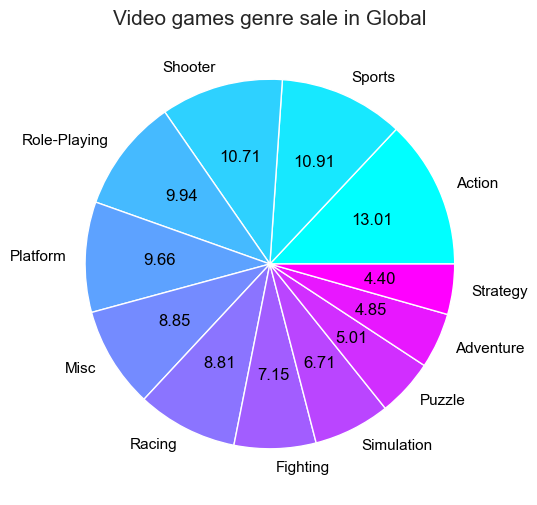

In [46]:
plt.figure(figsize=(8,6))
Global_group["Genre"].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Video games genre sale in Global',fontsize=15)
plt.ylabel("")
plt.show()

In [47]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

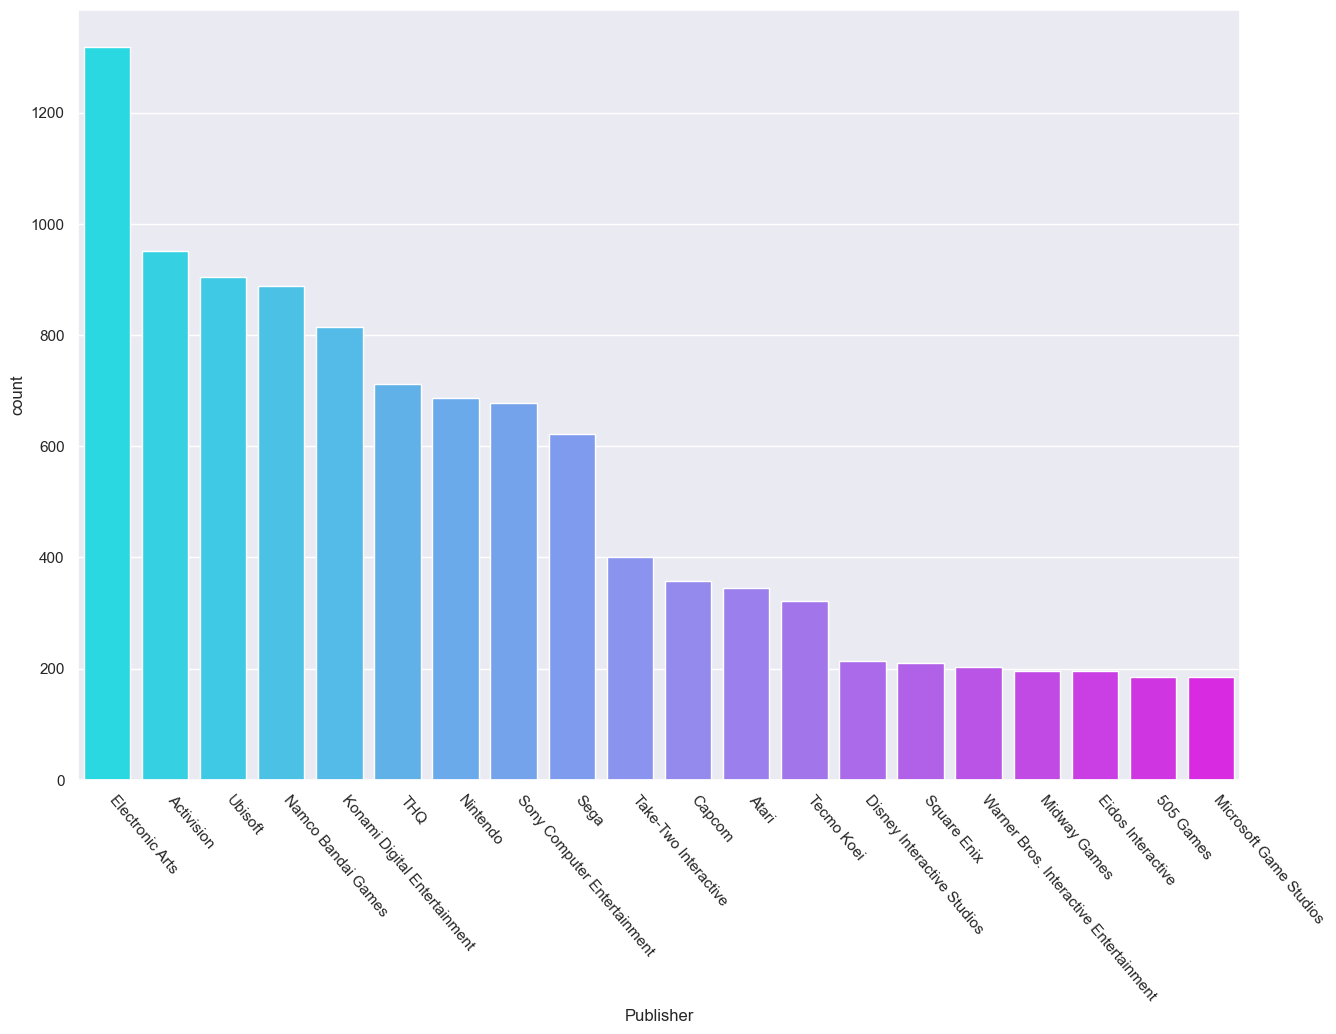

In [48]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, palette='cool', order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=-50, ha = "left")
plt.show()

In [49]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [50]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)

In [51]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,814.59
1,Electronic Arts,NA_Sales,580.58
2,Activision,NA_Sales,424.34
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,248.69
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.15
76,Eidos Interactive,Other_Sales,7.90
77,LucasArts,Other_Sales,10.28
78,Bethesda Softworks,Other_Sales,9.81


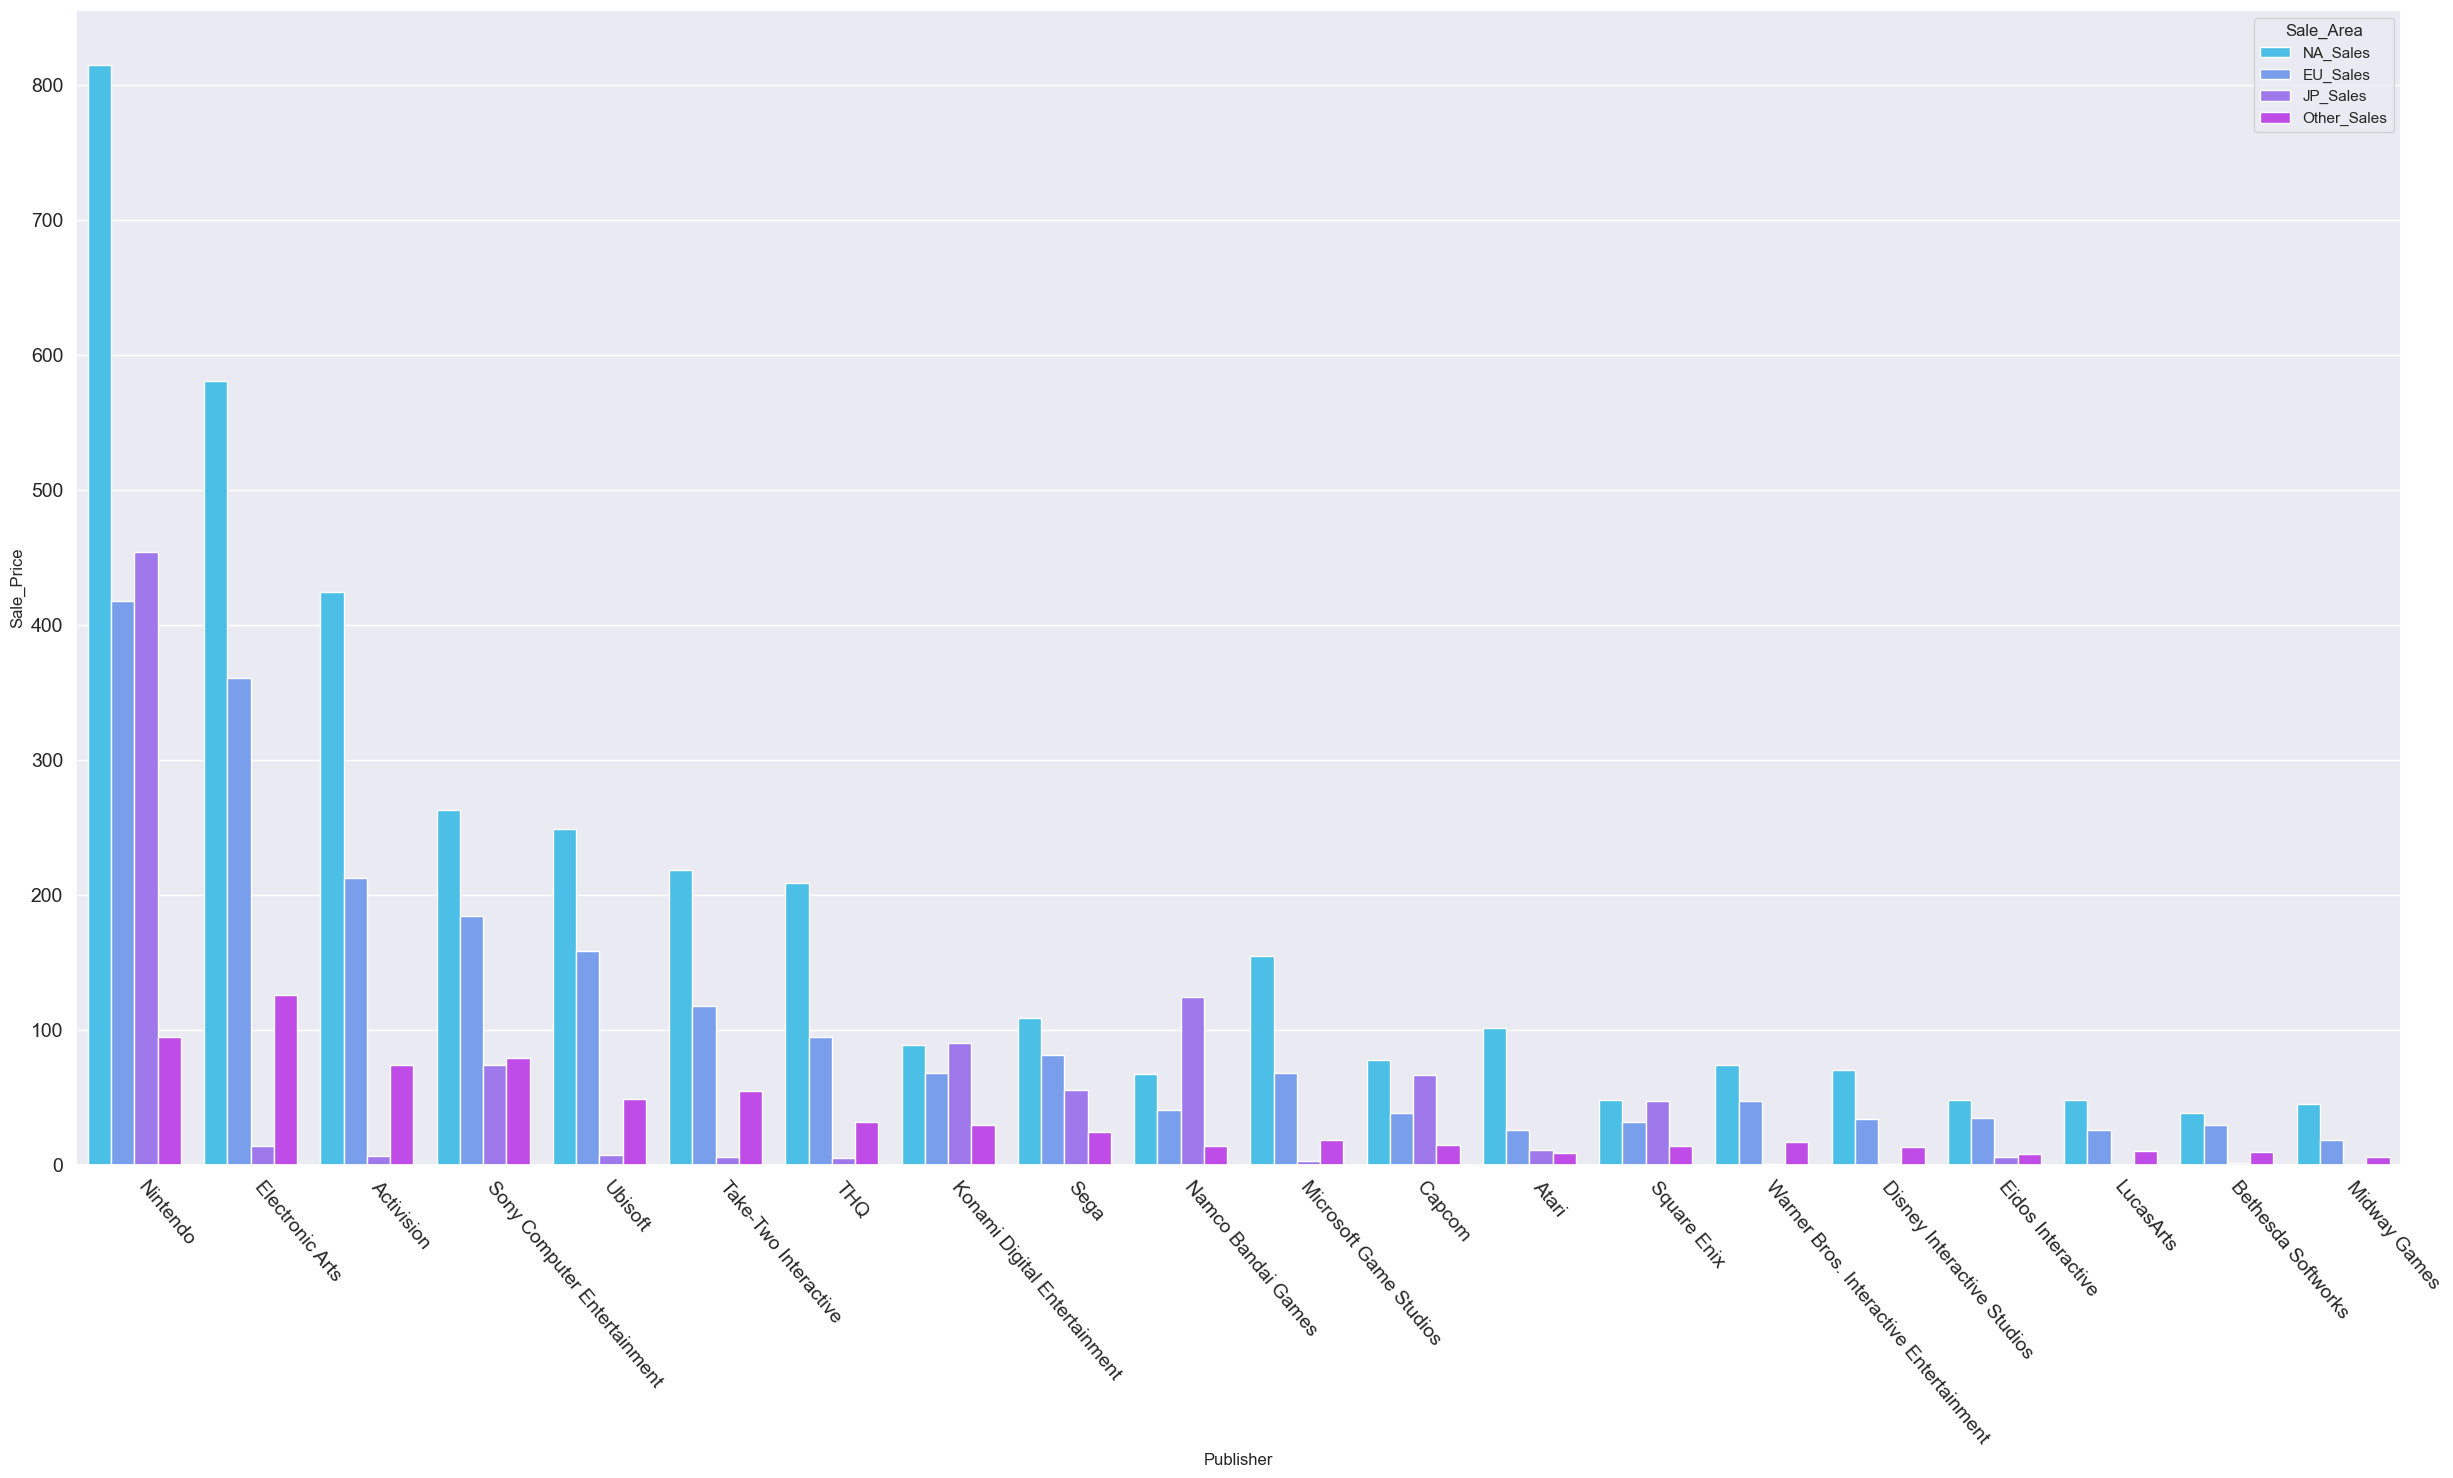

In [52]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', palette='cool', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=-50, ha="left")
plt.yticks(fontsize=14)
plt.show()

In [53]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

In [54]:
sale_pbl

,Publisher,Global_Sales
0,Nintendo,1780.96
1,Electronic Arts,1081.14
2,Activision,717.74
3,Sony Computer Entertainment,600.72
4,Ubisoft,463.49
5,Take-Two Interactive,396.41
6,THQ,340.44
7,Konami Digital Entertainment,277.35
8,Sega,269.89
9,Namco Bandai Games,247.16


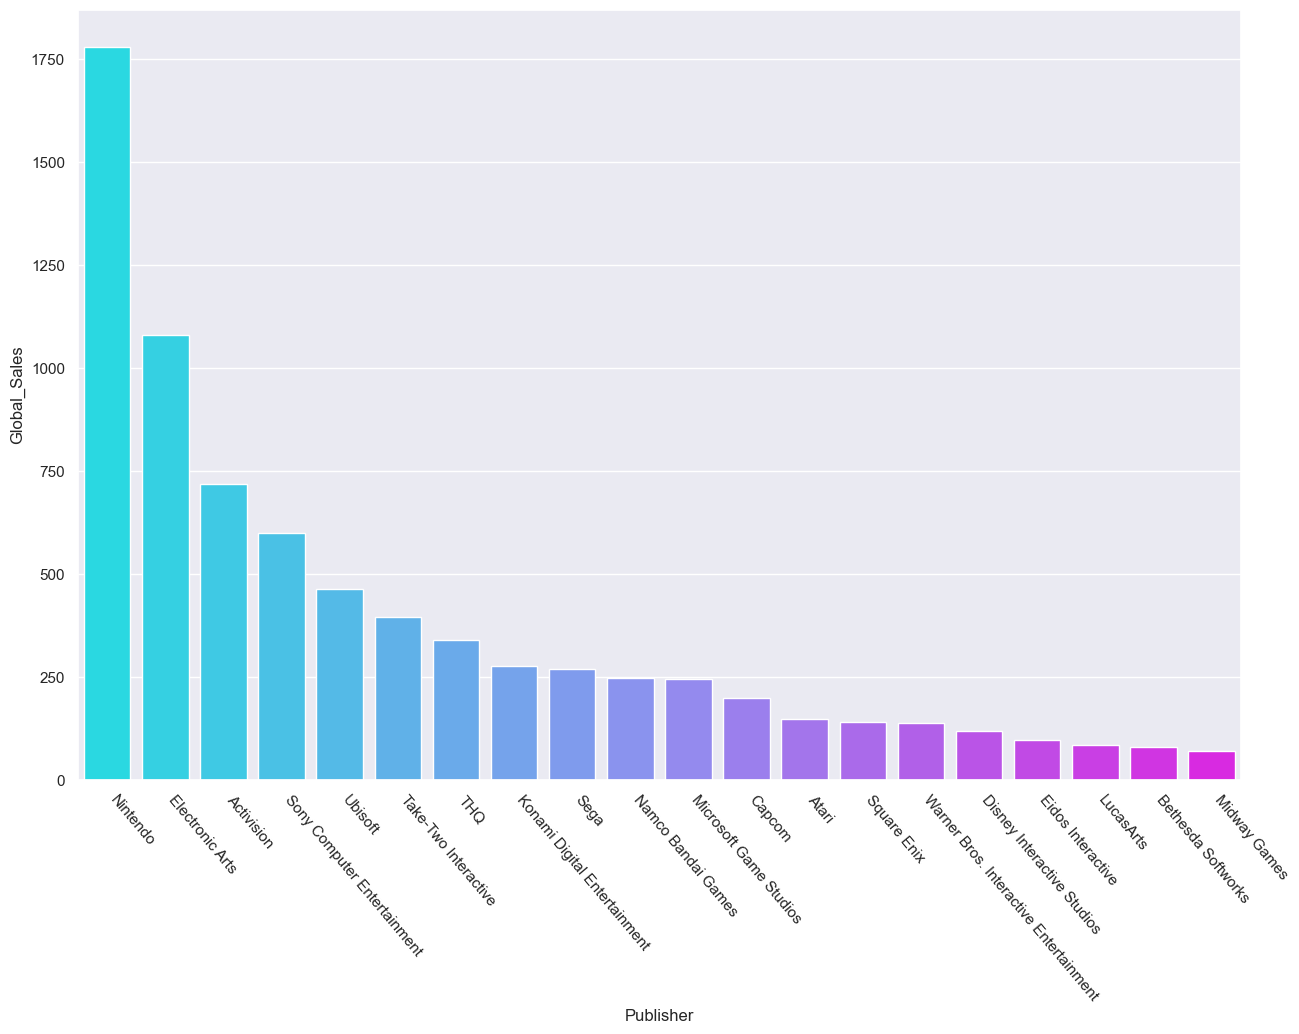

In [55]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales',palette = "cool", data=sale_pbl)
plt.xticks(rotation=-50, ha = "left")
plt.show()

In [56]:
NA_sale_pbl = data[['Publisher', 'NA_Sales']]
NA_sale_pbl = NA_sale_pbl.groupby('Publisher')['NA_Sales'].sum().sort_values(ascending=False).head(20)
NA_sale_pbl = pd.DataFrame(NA_sale_pbl).reset_index()
NA_sale_pbl

,Publisher,NA_Sales
0,Nintendo,814.59
1,Electronic Arts,580.58
2,Activision,424.34
3,Sony Computer Entertainment,262.79
4,Ubisoft,248.69
5,Take-Two Interactive,218.64
6,THQ,208.60
7,Microsoft Game Studios,154.69
8,Sega,108.65
9,Atari,101.23


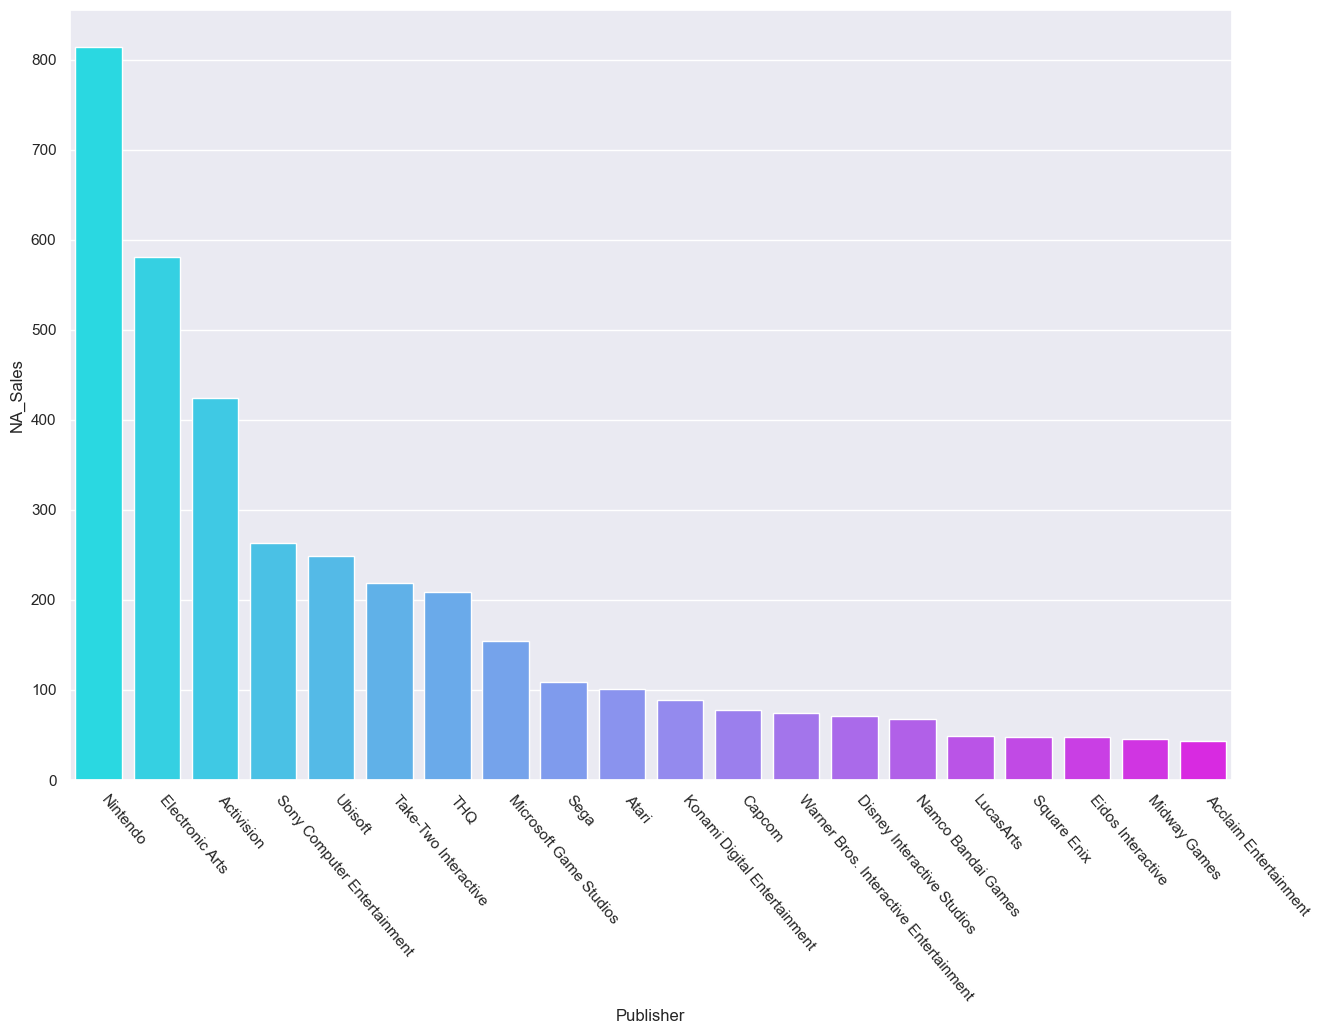

In [57]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='NA_Sales',palette = "cool", data=NA_sale_pbl)
plt.xticks(rotation=-50, ha = "left")
plt.show()

In [58]:
EU_sale_pbl = data[['Publisher', 'EU_Sales']]
EU_sale_pbl = EU_sale_pbl.groupby('Publisher')['EU_Sales'].sum().sort_values(ascending=False).head(20)
EU_sale_pbl = pd.DataFrame(EU_sale_pbl).reset_index()
EU_sale_pbl

,Publisher,EU_Sales
0,Nintendo,417.37
1,Electronic Arts,360.47
2,Activision,212.33
3,Sony Computer Entertainment,184.68
4,Ubisoft,158.65
5,Take-Two Interactive,117.33
6,THQ,94.60
7,Sega,81.27
8,Konami Digital Entertainment,68.14
9,Microsoft Game Studios,68.10


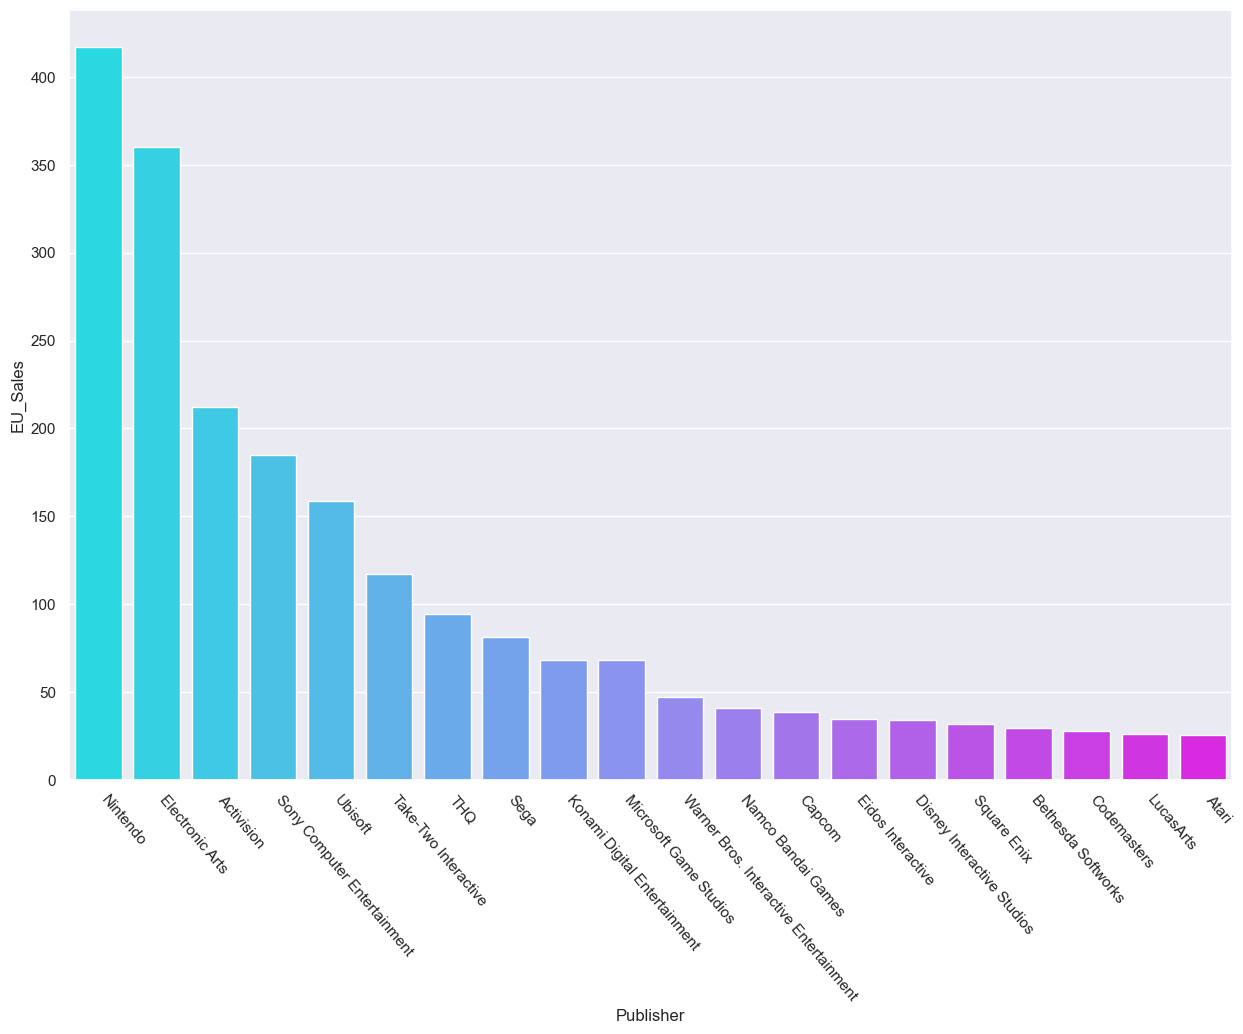

In [59]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='EU_Sales',palette = "cool", data=EU_sale_pbl)
plt.xticks(rotation=-50, ha = "left")
plt.show()

In [60]:
JP_sale_pbl = data[['Publisher', 'JP_Sales']]
JP_sale_pbl = JP_sale_pbl.groupby('Publisher')['JP_Sales'].sum().sort_values(ascending=False).head(20)
JP_sale_pbl = pd.DataFrame(JP_sale_pbl).reset_index()
JP_sale_pbl

,Publisher,JP_Sales
0,Nintendo,453.82
1,Namco Bandai Games,124.50
2,Konami Digital Entertainment,90.30
3,Sony Computer Entertainment,73.88
4,Capcom,66.85
5,Sega,55.70
6,Square Enix,47.56
7,SquareSoft,40.13
8,Enix Corporation,32.40
9,Tecmo Koei,28.43


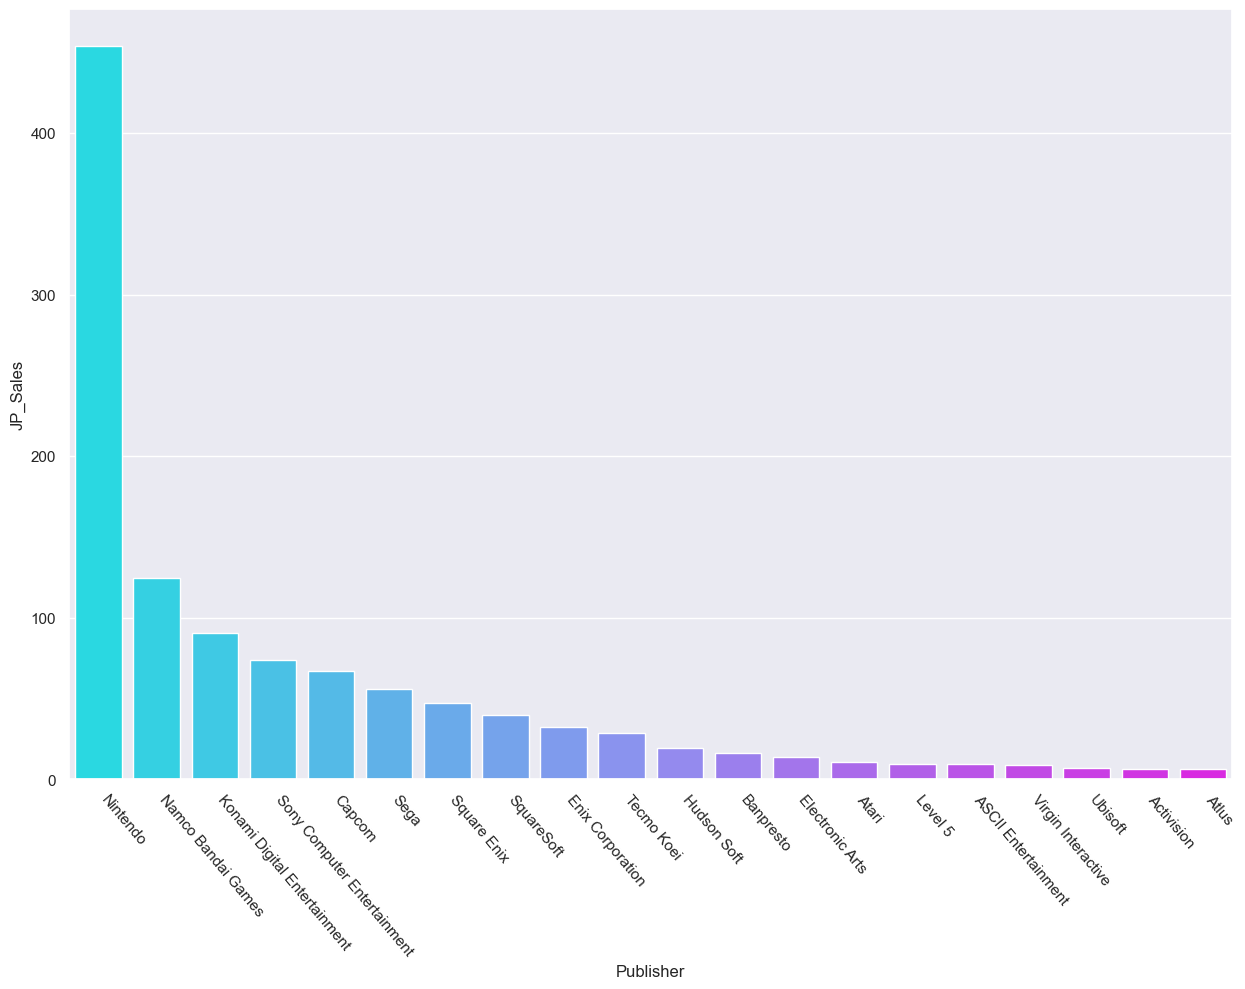

In [61]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='JP_Sales',palette = "cool", data=JP_sale_pbl)
plt.xticks(rotation=-50, ha = "left")
plt.show()

In [62]:
Other_sale_pbl = data[['Publisher', 'Other_Sales']]
Other_sale_pbl = Other_sale_pbl.groupby('Publisher')['Other_Sales'].sum().sort_values(ascending=False).head(20)
Other_sale_pbl = pd.DataFrame(Other_sale_pbl).reset_index()
Other_sale_pbl

,Publisher,Other_Sales
0,Electronic Arts,126.00
1,Nintendo,94.99
2,Sony Computer Entertainment,79.35
3,Activision,74.35
4,Take-Two Interactive,54.76
5,Ubisoft,48.86
6,THQ,32.11
7,Konami Digital Entertainment,29.84
8,Sega,24.27
9,Microsoft Game Studios,18.45


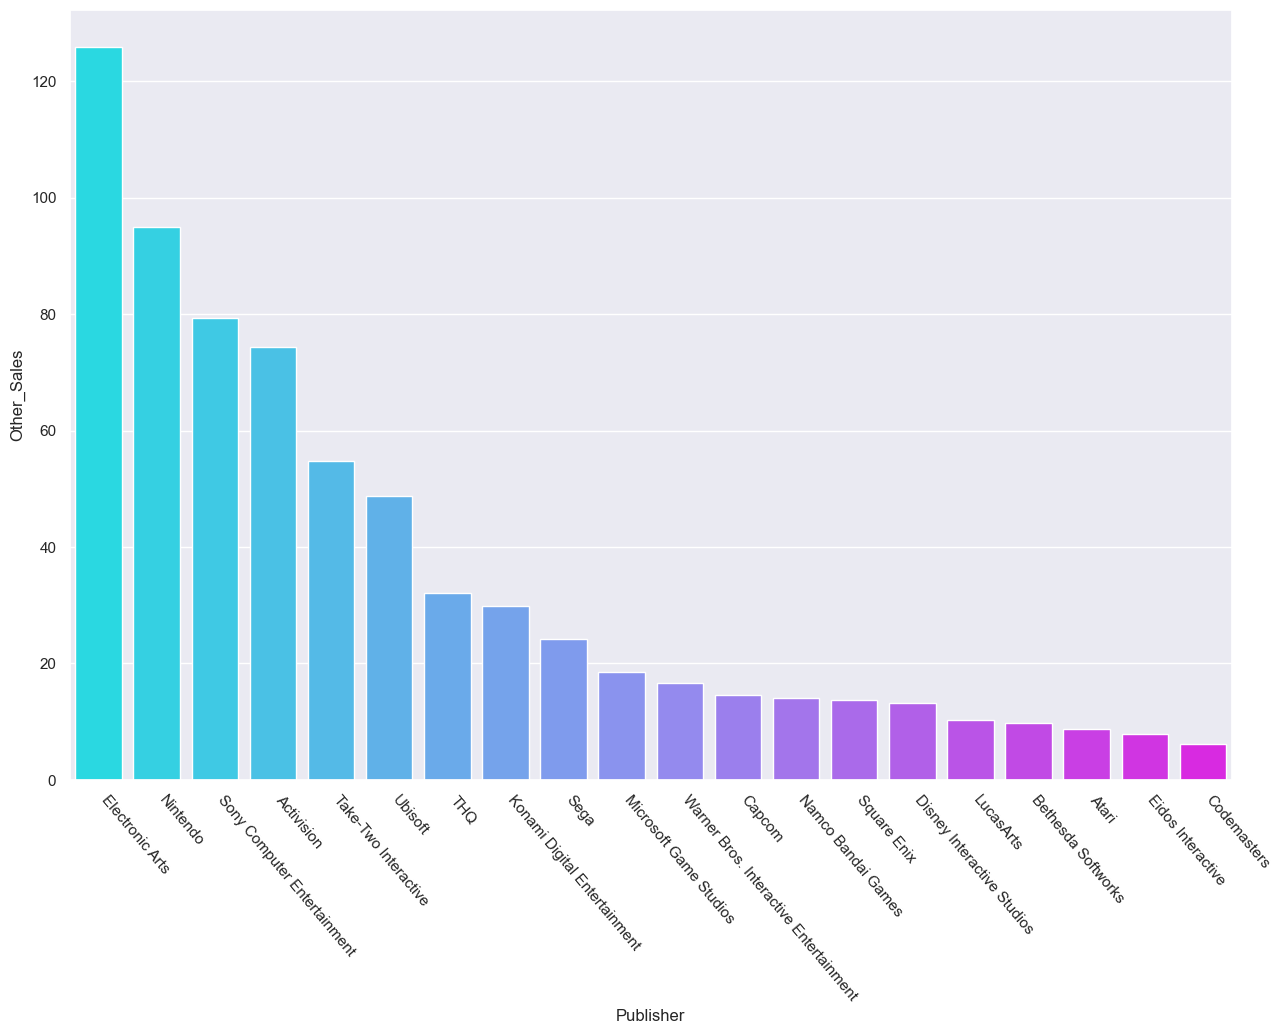

In [63]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Other_Sales',palette = "cool", data=Other_sale_pbl)
plt.xticks(rotation=-50, ha = "left")
plt.show()

In [64]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,%_sales_NA,%_sales_EU,%_sales_JP,%_sales_Other,%_sales_Global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.963826,1.219364,0.296722,1.083032,0.946603
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.675538,0.150425,0.535988,0.098574,0.460373
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.368200,0.541192,0.298296,0.423740,0.409806
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.365877,0.462619,0.258156,0.378933,0.377543
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.261806,0.373540,0.804376,0.128018,0.358895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15940,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.000232,0.000000,0.000000,0.000000,0.000114
15941,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.000232,0.000000,0.000000,0.000000,0.000114
15942,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.000000,0.000114
15943,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.000000,0.000420,0.000000,0.000000,0.000114


In [65]:
data.to_csv("videogames_final_projects.csv", index =False)

In [66]:
data.to_csv("video_games_final.csv", index = False)

In [67]:
data_head = data.head()

In [69]:
data_head.to_csv("muestra_video_games.csv", index = False)